**Iris dataset classification using Support Vector Machines (SVM) and Principal Component Analysis (PCA)**

In [46]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
import matplotlib.pyplot as plt
import numpy as np

**Prep the data**

In [55]:
# Load data
X, y = datasets.load_iris(return_X_y=True)

In [50]:
# Report shape
X.shape, y.shape

((150, 4), (150,))

In [57]:
# Create train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [64]:
# Scale data based on train data (to ensure test data does not influence models)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

**Evaluate different kernels and hyperparameters**

In [65]:
# Evaluate different kernels
for kernel in ['linear', 'poly', 'rbf']:

  max_score = 0

  # Evaluate different c and gamma values
  for c in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 40]:
    for gamma in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 40]:

      # Fit the training data
      clf = svm.SVC(kernel=kernel, gamma=gamma, C=c, random_state=42)

      # Evaluate different numbers of folds
      for fold in [3, 4, 5, 6]:

        scores = cross_val_score(clf, X_train, y_train, cv=fold)
     
        # Save the best configuration values
        if scores.mean() > max_score:
          max_score = scores.mean()
          best_c = c
          best_gamma = gamma
          best_fold = fold
          best_clf = clf

  # Print optimum values
  print(f"Optimum values for the {kernel} kernel | c: {best_c} gamma: {best_gamma} fold: {fold} score: {max_score}")

  # Now fit best configuration using all of training data
  best_clf.fit(X_train, y_train)

  # Score the model against the test data
  score = best_clf.score(X_test, y_test)
  print(f"Test data score: {score}\n")

Optimum values for the linear kernel | c: 3 gamma: 0.01 fold: 6 score: 0.9531590413943355
Test data score: 0.9777777777777777

Optimum values for the poly kernel | c: 0.1 gamma: 1 fold: 6 score: 0.9619047619047619
Test data score: 0.9777777777777777

Optimum values for the rbf kernel | c: 10 gamma: 0.03 fold: 6 score: 0.9619047619047619
Test data score: 1.0



**Evaluate different kernels and hyperparameters, and use Principal Component Analysis (PCA) to reduce dimensionality**

In [66]:
# Use PCA to reduce dimensionality to 2D for train and test features
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True).fit(X_train)
X_train_2d = pca.transform(X_train)

pca = PCA(n_components=2, whiten=True).fit(X_test)
X_test_2d = pca.transform(X_test)

Optimum values for the linear kernel | c: 1 gamma: 0.01 fold: 6 score: 0.9047619047619048
Test data score: 0.9111111111111111

Optimum values for the poly kernel | c: 0.01 gamma: 10 fold: 6 score: 0.9333333333333332
Test data score: 0.9111111111111111

Optimum values for the rbf kernel | c: 40 gamma: 0.03 fold: 6 score: 0.9142857142857143
Test data score: 0.8888888888888888



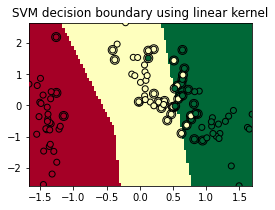

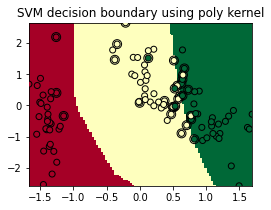

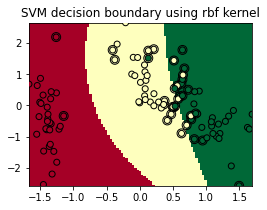

In [67]:
plot_num = 1

# Evaluate different kernels
for kernel in ['linear', 'poly', 'rbf']:

  max_score = 0

  # Evaluate different c and gamma values
  for c in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 40]:
    for gamma in [0.01, 0.03, 0.1, 0.3, 1, 3, 10, 30, 40]:

      # Fit the training data
      clf = svm.SVC(kernel=kernel, gamma=gamma, C=c, random_state=42)

      # Evaluate different numbers of folds
      for fold in [3, 4, 5, 6]:

        scores = cross_val_score(clf, X_train_2d, y_train, cv=fold)
     
        # Save the best configuration values
        if scores.mean() > max_score:
          max_score = scores.mean()
          best_c = c
          best_gamma = gamma
          best_fold = fold
          best_clf = clf

  # Print optimum values
  print(f"Optimum values for the {kernel} kernel | c: {best_c} gamma: {best_gamma} fold: {fold} score: {max_score}")

  # Now fit best configuration using all of training data
  best_clf.fit(X_train_2d, y_train)

  # Score the model against the test data
  score = best_clf.score(X_test_2d, y_test)
  print(f"Test data score: {score}\n")

  # Prepare the plot number plot_num
  plt.figure(plot_num, figsize=(4, 3))
  plt.clf()
  plt.title(f"SVM decision boundary using {kernel} kernel")

  # Plot support vectors
  plt.scatter(best_clf.support_vectors_[:, 0], best_clf.support_vectors_[:, 1], s=80, facecolors='none', zorder=10, edgecolors='k')

  # Plot points
  plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], c=y_train, zorder=10, cmap='RdYlGn', edgecolors='k')

  # Create points within a defined range to use for contour plotting; X1 is (10, 10) and X2 is (10, 10)
  x1_min = min(X_train_2d[:, 0])
  x1_max = max(X_train_2d[:, 0])
  x2_min = min(X_train_2d[:, 1])
  x2_max = max(X_train_2d[:, 1])
  X1, X2 = np.mgrid[x1_min:x1_max:100j, x2_min:x2_max:100j]

  # Unravel points and then classify; Z is (10000, 3) because there are 3 classifications
  Z = best_clf.decision_function(np.c_[X1.ravel(), X2.ravel()])

  # For each row, return the 0-based index of the column with the highest value (probability) and then add 1 so in same range as labels (1, 2, 3)
  # Z becomes (10000, )
  Z = np.argmax(Z, axis=1) + 1

  # Put the result into a color plot; Z becomes (100, 100)
  Z = Z.reshape(X1.shape)

  # Use red, yellow nd green to distinguish the boundaries
  plt.pcolormesh(X1, X2, Z, cmap='RdYlGn')

  plot_num += 1